In [1]:
import numpy as np 
import pandas as pd

In [2]:
data_path = 'CHESS_DATA.csv'
data = pd.read_csv(data_path)
data = data[:30000]

In [3]:
alphabet = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
x_columns = list()
for i in range(1, 9):
    for j in range(1, 9):
        x_columns.append(f'{alphabet[j-1]}{i}')

In [4]:
from sklearn.preprocessing import LabelEncoder
input_encoder = LabelEncoder()
output_encoder = LabelEncoder()

In [5]:
for col in x_columns:
    data[col] = output_encoder.fit_transform(data[col])
X = data[x_columns]

In [6]:
X

,A1,B1,C1,D1,E1,F1,G1,H1,A2,B2,...,G7,H7,A8,B8,C8,D8,E8,F8,G8,H8
0,9,8,6,9,7,6,8,9,9,10,...,4,4,5,3,1,4,2,1,3,5
1,9,8,6,9,7,6,8,9,9,10,...,4,4,5,3,1,4,2,1,3,5
2,9,8,6,9,7,6,8,9,9,10,...,4,4,5,3,1,4,2,1,3,5
3,9,8,6,9,7,6,8,9,9,10,...,4,4,5,3,1,4,2,1,3,5
4,9,8,6,9,7,6,8,9,9,10,...,4,4,5,3,1,4,2,1,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,9,0,6,0,7,0,0,0,9,10,...,0,2,5,0,4,0,0,5,0,0
29996,9,0,6,0,7,0,0,0,9,10,...,0,2,5,0,0,4,0,5,0,0
29997,9,0,6,0,7,0,0,0,9,10,...,0,2,5,0,0,4,0,5,0,0
29998,9,0,6,0,7,0,0,0,9,10,...,0,0,5,0,0,4,0,5,2,0


In [8]:
y = np.array(data['MOVE_FROM'])
y = output_encoder.fit_transform(y)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.20, random_state=1)

In [11]:
INPUT = X_valid.shape[1]
OUTPUT = 64

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization 
model = Sequential()
model.add(Dense(INPUT, input_shape=(INPUT,), activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(OUTPUT, activation='softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer = 'adam', metrics = ['accuracy'])

In [13]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]

In [14]:
history = model.fit(X_train, y_train, epochs = 100, validation_data=(X_valid,y_valid))

Epoch 1/100
750/750 [==============================] - 4s 3ms/step - loss: 4.0036 - accuracy: 0.0459 - val_loss: 3.9261 - val_accuracy: 0.0520
Epoch 2/100
750/750 [==============================] - 2s 3ms/step - loss: 3.8385 - accuracy: 0.0711 - val_loss: 3.8445 - val_accuracy: 0.0702
Epoch 3/100
750/750 [==============================] - 2s 3ms/step - loss: 3.7030 - accuracy: 0.0918 - val_loss: 3.8524 - val_accuracy: 0.0747
Epoch 4/100
750/750 [==============================] - 2s 3ms/step - loss: 3.5811 - accuracy: 0.1087 - val_loss: 3.8495 - val_accuracy: 0.0780
Epoch 5/100
750/750 [==============================] - 2s 3ms/step - loss: 3.4536 - accuracy: 0.1297 - val_loss: 3.8530 - val_accuracy: 0.0728
Epoch 6/100
750/750 [==============================] - 2s 3ms/step - loss: 3.3147 - accuracy: 0.1560 - val_loss: 3.9121 - val_accuracy: 0.0725
Epoch 7/100
750/750 [==============================] - 2s 3ms/step - loss: 3.1665 - accuracy: 0.1782 - val_loss: 3.9686 - val_accuracy: 0.0743

Epoch 58/100
750/750 [==============================] - 2s 3ms/step - loss: 0.6549 - accuracy: 0.8042 - val_loss: 11.9400 - val_accuracy: 0.0428
Epoch 59/100
750/750 [==============================] - 2s 3ms/step - loss: 0.6738 - accuracy: 0.8021 - val_loss: 12.1691 - val_accuracy: 0.0378
Epoch 60/100
750/750 [==============================] - 2s 3ms/step - loss: 0.6403 - accuracy: 0.8072 - val_loss: 11.9716 - val_accuracy: 0.0382
Epoch 61/100
750/750 [==============================] - 2s 3ms/step - loss: 0.6610 - accuracy: 0.8018 - val_loss: 12.0720 - val_accuracy: 0.0368
Epoch 62/100
750/750 [==============================] - 3s 3ms/step - loss: 0.6699 - accuracy: 0.8005 - val_loss: 12.0694 - val_accuracy: 0.0408
Epoch 63/100
750/750 [==============================] - 2s 3ms/step - loss: 0.6451 - accuracy: 0.8091 - val_loss: 12.2538 - val_accuracy: 0.0412
Epoch 64/100
750/750 [==============================] - 2s 3ms/step - loss: 0.6286 - accuracy: 0.8125 - val_loss: 11.9879 - val_ac

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 512)               33280     
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
Total params: 209,920
Trainable params: 209,920
Non-trainable params: 0
_________________________________________________________________


In [16]:
import matplotlib.pylab as plt

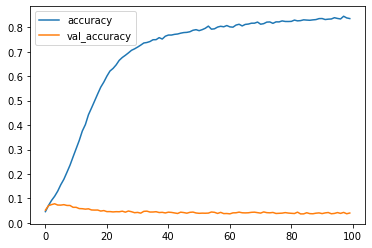

In [17]:
plt.plot(history.epoch,history.history.get('accuracy'),label='accuracy')
plt.plot(history.epoch,history.history.get('val_accuracy'),label='val_accuracy')
plt.legend()

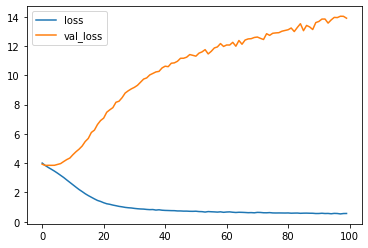

In [18]:
plt.plot(history.epoch,history.history.get('loss'),label='loss')
plt.plot(history.epoch,history.history.get('val_loss'),label='val_loss')
plt.legend()